In [1]:
#import necessary packages
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.datasets import fetch_lfw_people 
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [2]:
#load data set
db=fetch_lfw_people (min_faces_per_person=100)
_,h,w=db.images.shape
X=db.data
y=db.target
target_names=db.target_names

In [3]:
#test and train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [4]:
#compute pca
n_components=100
pca=PCA(n_components=n_components,whiten=True).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [5]:
#nn
clf=MLPClassifier(hidden_layer_sizes=(1024),batch_size=256,verbose=True,early_stopping=True).fit(X_train_pca,y_train)
y_pred=clf.predict(X_test_pca)
print(classification_report(y_test,y_pred,target_names=target_names))

Iteration 1, loss = 1.49624904
Validation score: 0.600000
Iteration 2, loss = 1.10779831
Validation score: 0.612500
Iteration 3, loss = 0.88244145
Validation score: 0.662500
Iteration 4, loss = 0.68365214
Validation score: 0.750000
Iteration 5, loss = 0.53212927
Validation score: 0.800000
Iteration 6, loss = 0.42430355
Validation score: 0.787500
Iteration 7, loss = 0.34248770
Validation score: 0.825000
Iteration 8, loss = 0.27827736
Validation score: 0.825000
Iteration 9, loss = 0.22622212
Validation score: 0.825000
Iteration 10, loss = 0.18564647
Validation score: 0.812500
Iteration 11, loss = 0.15378783
Validation score: 0.812500
Iteration 12, loss = 0.12964197
Validation score: 0.812500
Iteration 13, loss = 0.10932356
Validation score: 0.812500
Iteration 14, loss = 0.09311178
Validation score: 0.812500
Iteration 15, loss = 0.07990772
Validation score: 0.800000
Iteration 16, loss = 0.06931340
Validation score: 0.800000
Iteration 17, loss = 0.06078726
Validation score: 0.812500
Iterat

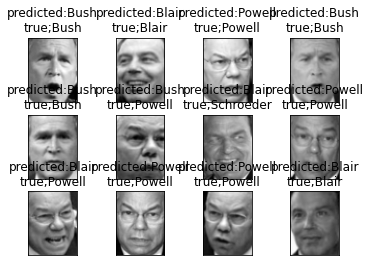

In [6]:
def plot_gallery(images,titles,h,w,rows=3,cols=4):
    plt.figure()
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
def titles(y_pred,y_test,target_names):
    for i in range(y_pred.shape[0]):
        pred_name=target_names[y_pred[i]].split()[-1]
        true_name=target_names[y_test[i]].split()[-1] 
        yield'predicted:{0}\ntrue;{1}'.format(pred_name,true_name)

prediction_titles=list(titles(y_pred,y_test,target_names))
plot_gallery(X_test,prediction_titles,h,w)    
plt.show()